In [13]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [16]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [17]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [18]:
data.set_index('Month',inplace=True)

In [19]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


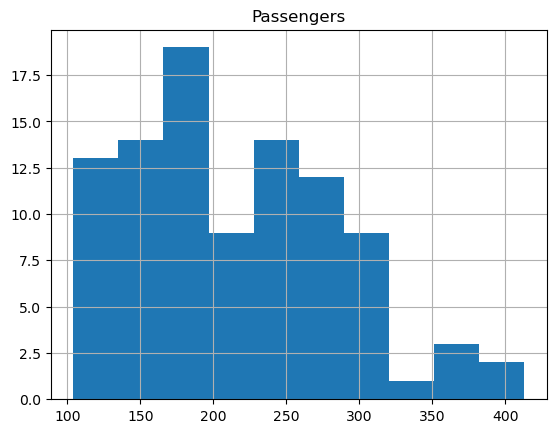

In [20]:
data.hist()
pyplot.show()

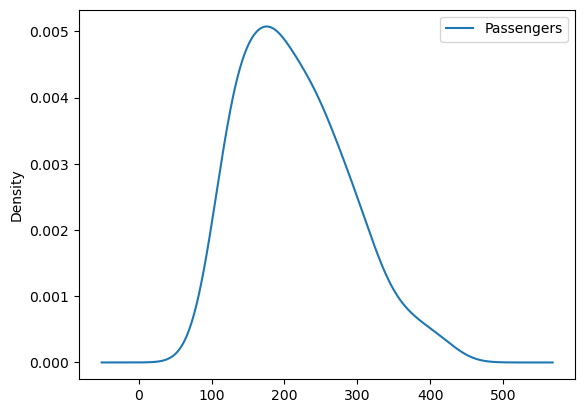

In [21]:
data.plot(kind='kde')
pyplot.show()

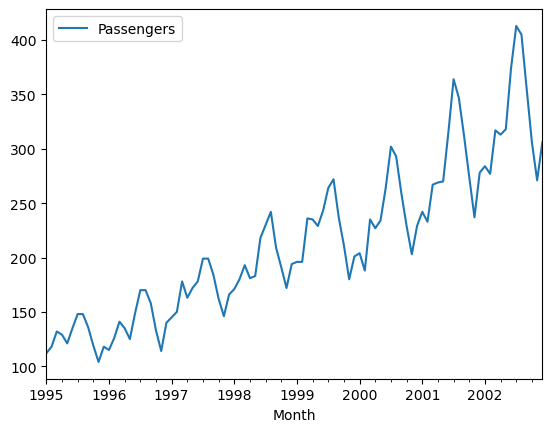

In [22]:
data.plot();
pyplot.show()

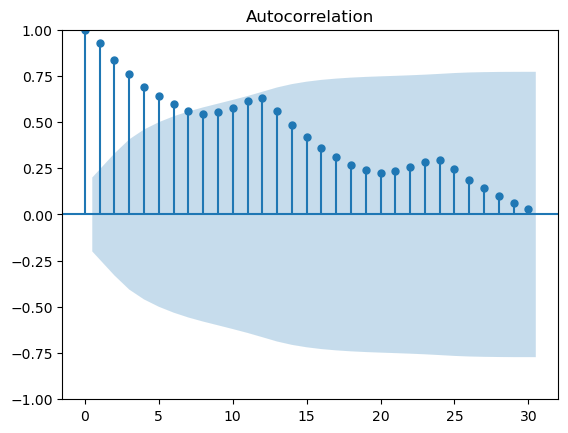

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data,lags=30)
plt.show()

In [33]:
upsampled = data.resample('M').mean()
print(upsampled)

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
...                ...
2002-08-31       405.0
2002-09-30       355.0
2002-10-31       306.0
2002-11-30       271.0
2002-12-31       306.0

[96 rows x 1 columns]


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       148.0
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31       118.0
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0


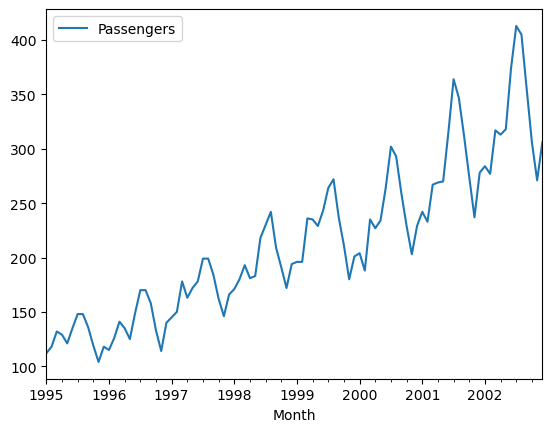

In [25]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(15))
interpolated.plot()
plt.show()

In [26]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-08-31,405.0
2002-09-30,355.0
2002-10-31,306.0


In [29]:
from pandas import DataFrame
from numpy import sqrt
dataframe = DataFrame(data.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = sqrt(dataframe['Passengers'])

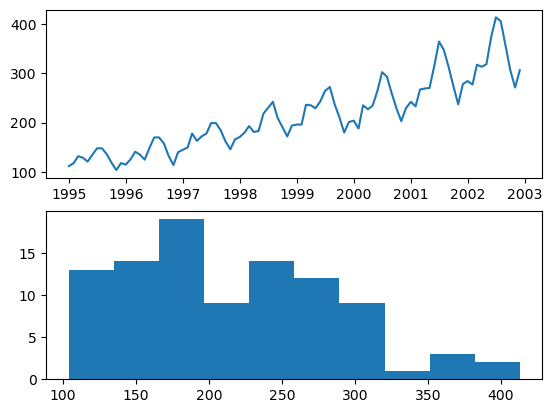

In [30]:
# line plot
plt.subplot(211)
plt.plot(data['Passengers'])
# histogram
plt.subplot(212)
plt.hist(data['Passengers'])
plt.show()


In [31]:
from numpy import log

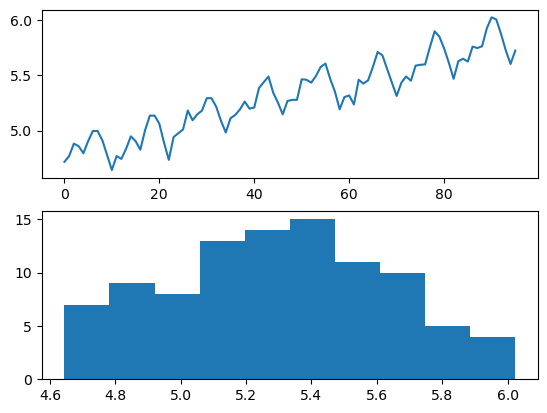

In [32]:
dataframe = DataFrame(data.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = log(dataframe['Passengers'])

# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [35]:
interpolated

,Passengers
Month,
1995-01-31,112.0
1995-02-28,118.0
1995-03-31,132.0
1995-04-30,129.0
1995-05-31,121.0
...,...
2002-08-31,405.0
2002-09-30,355.0
2002-10-31,306.0


In [36]:
interpolated.reset_index(inplace=True)

In [37]:
interpolated['t'] = 1

In [38]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1
interpolated

C:\Users\prana\AppData\Local\Temp\ipykernel_19880\2205293200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1


,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94
94,2002-11-30,271.0,95


In [39]:
interpolated['t_sq'] = (interpolated['t'])**2

In [40]:
interpolated["month"] = interpolated.Month.dt.strftime("%b") 
interpolated["year"] = interpolated.Month.dt.strftime("%Y") 

In [41]:
months = pd.get_dummies(interpolated['month'])

In [42]:
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
Airlines = pd.concat([interpolated,months],axis=1)
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-30,271.0,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
Airlines['log_passengers'] = np.log(Airlines['Passengers'])
Airlines

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585
94,2002-11-30,271.0,95,9025,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.602119


In [46]:
Train = Airlines.head(84) 
Test = Airlines.tail(12) 

<AxesSubplot:xlabel='year', ylabel='Passengers'>

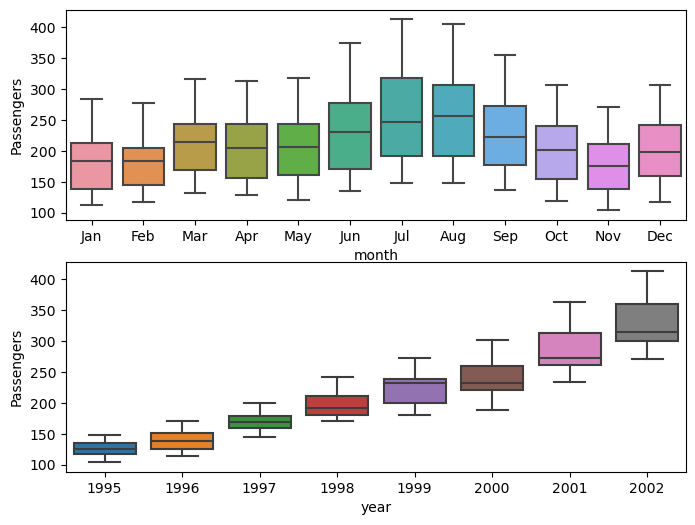

In [47]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Airlines)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

#### Linear model

In [48]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

53.199236534802715

#### Exponential model

In [49]:
Exp_model = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp=  pd.Series(Exp_model.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2)) 
rmse_Exp

46.0573611031562

#### Quadratic model

In [51]:
Quad_model= smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad_model.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad 

48.05188897933095

#### Additive seasonality

In [52]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

#### Additive seasonality with Quadratic

In [53]:
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612086453

#### Multiplicative seasonality

In [55]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(pd.DataFrame(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708646

#### Multiplicative seasonality with Quadratic

In [59]:
Mul_quad_sea = smf.ols('log_passengers~t++t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mul_quad_sea = pd.Series(Mul_quad_sea.predict(Test))
rmse_Mul_quad_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mul_quad_sea)))**2))
rmse_Mul_quad_sea

18.37201061822024

In [61]:
Models = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mul_quad_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mul_quad_sea])}
table_rmse=pd.DataFrame(Models)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mul_quad_sea,18.372011
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


#### From above we can consider model with multiplicative seasonality and quadratic trend
The data seems to be volatile i.e, it is unstable . We can say volatile data can make it difficult to accurately forecast future values, as the data may be subject to sudden, unexpected changes that cannot be easily predicted. So we use Data-driven methods.

#### Moving Average

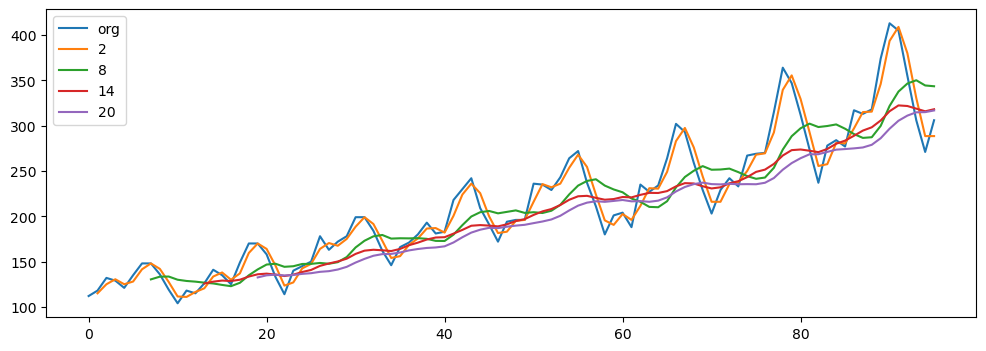

In [63]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,24,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

##### Seasonal decompose

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

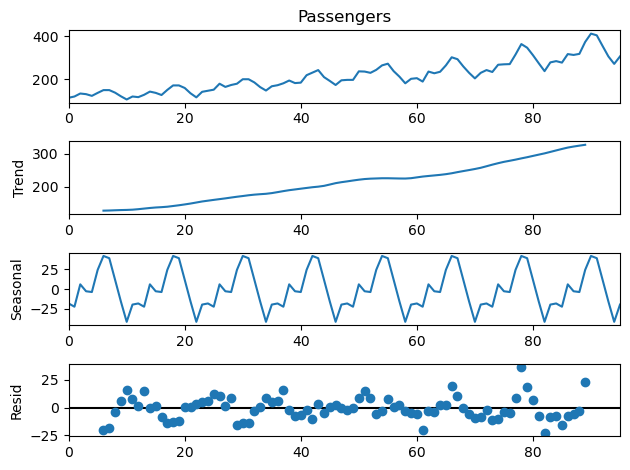

In [70]:
decompose_ts_add = seasonal_decompose(interpolated.Passengers,period=12)  
decompose_ts_add.plot()
plt.show()

#### ACF and PACF plots

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


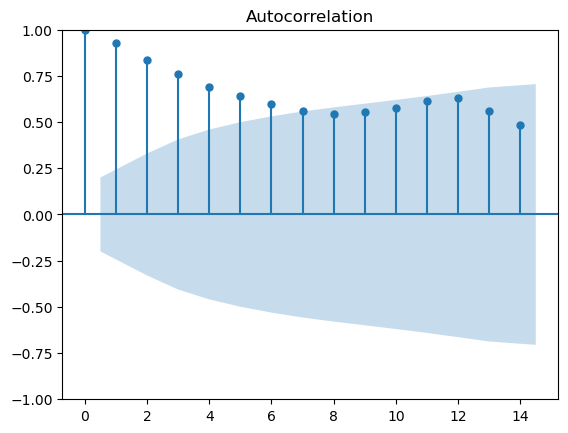

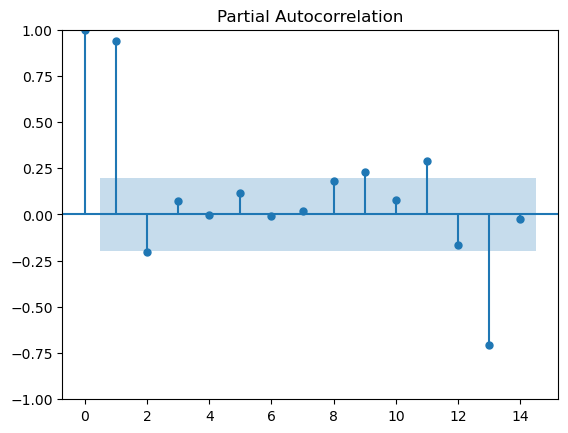

In [71]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=14)
tsa_plots.plot_pacf(interpolated.Passengers,lags=14)
plt.show()

#### MAPE

In [72]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

#### Simple Exponential method

In [75]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

13.411274740513823

#### Holts method

In [76]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\prana\AppData\Local\Temp\ipykernel_19880\2880781308.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)


10.887677818146857

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [77]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\prana\AppData\Local\Temp\ipykernel_19880\3047529225.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


2.635242513871409

#### Holts winter exponential smoothing multiplicative seasonality and additive trend

In [78]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\Users\prana\AppData\Local\Temp\ipykernel_19880\2440570425.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


2.154668846857771

#### From above we consider Holts winter exponential smoothing with multiplicative seasonality and additive trend since its MAPE value is low.

#### Final model by combiming train and test data

In [81]:
hwe_model_mul_add_final = ExponentialSmoothing(Airlines["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [82]:
hwe_model_mul_add.forecast(12)  

84    275.048067
85    274.973758
86    323.779069
87    316.288711
88    317.438327
89    359.792865
90    404.833241
91    403.654545
92    360.080948
93    318.135226
94    277.773207
95    320.081863
dtype: float64

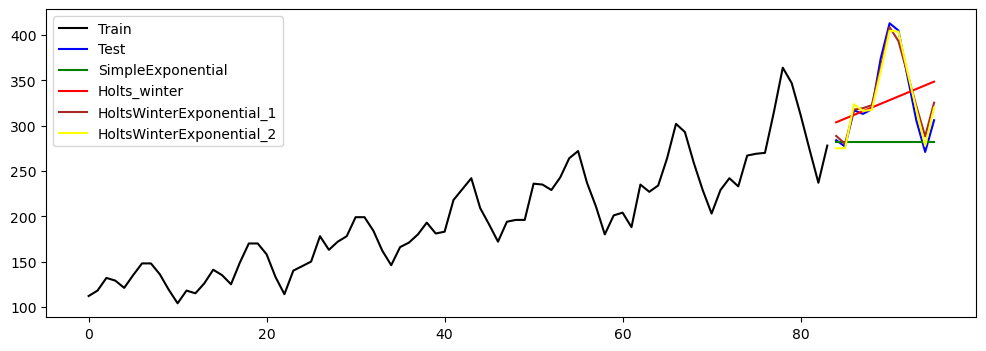

In [83]:
plt.figure(figsize=(12,4))
plt.plot(Train.index, Train["Passengers"], label='Train',color="black")
plt.plot(Test.index, Test["Passengers"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best');

### ARIMA model

In [84]:
! pip install pmdarima

In [85]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [87]:
stepwise_fit = auto_arima(Airlines['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True,
                          stepwise = True)         
  

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.00 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.01 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.11 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.06 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Tue, 07 Feb 2023   AIC                            615.965
Time:                                    20:33:02   BIC                            623.222
Sample:                                         0   HQIC                           618.881
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(Train['Passengers'], 
                order = (1, 1, 0), 
                seasonal_order =(1,1,0,12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -262.555
Date:                            Tue, 07 Feb 2023   AIC                            531.110
Time:                                    20:33:42   BIC                            537.898
Sample:                                         0   HQIC                           533.810
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2377      0.108     -2.204      0.028      -0.449      -0.026
ar.S.L12      -0.2595      0.097     -2.685      0.007      -0.449      -0.070
sigma2        94.2022     16.779      5.614      0.000      61.315     127.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.98   Prob(JB):                         0.32
Heteroskedasticity (H):               2.60   Skew:                             0.41
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

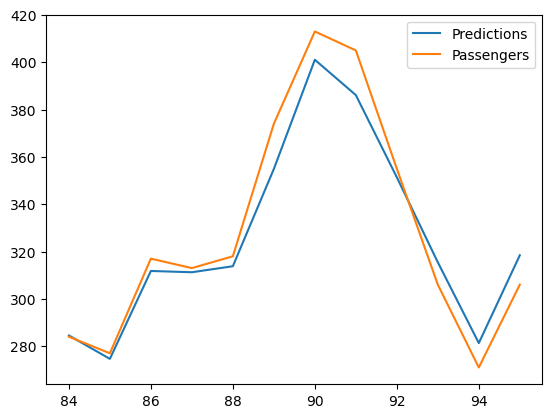

In [90]:
start = len(Train)
end = len(Train) + len(Test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
Test['Passengers'].plot(legend = True)

In [92]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
rmse(Test["Passengers"], predictions)
  
mean_squared_error(Test["Passengers"], predictions)


106.74352891720851

<AxesSubplot:>

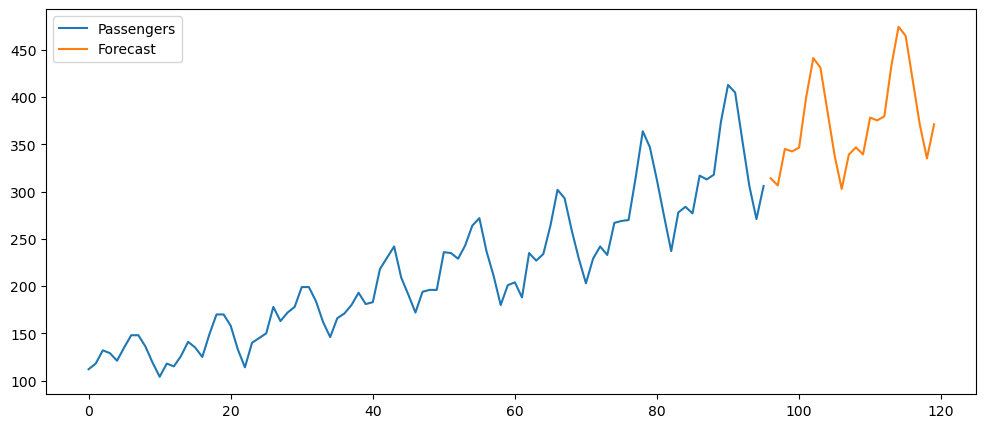

In [94]:
model = model = SARIMAX(Airlines['Passengers'], 
                        order = (1, 1, 0), 
                        seasonal_order =(1,1,0,12))
result = model.fit()
  
# Forecast for the next 2 years
forecast = result.predict(start = len(Airlines), 
                          end = (len(Airlines)-1) + 2 * 12, 
                          typ = 'levels').rename('Forecast')
  
Airlines['Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)